In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [46]:
evaluation_data = pd.read_csv('./results/results_16_06_2022_23_57_11.csv')

# Results Analysis

In [47]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [48]:
evaluation_data.tail(10)

,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time (s),LastTokenQuery,EquivalenceQuery,OT Prefixes,OT Suffixes,Tree Depth,Inner Nodes,LogProbError,WER,NDCG,OOPartition,OOTolerance,AbsoluteError
1430,QuantNaryTreeLearner,random_PDFA_nominal_size_300_2_8,303,303,9,113.455746,8649,303,NaN,NaN,11.0,301.0,0.0,0.0,1.0,0,0,0.0
1431,QuantNaryTreeLearner,random_PDFA_nominal_size_300_2_9,301,301,1,107.256292,8718,301,NaN,NaN,11.0,299.0,0.0,0.0,1.0,0,0,0.0
1432,QuantNaryTreeLearner,random_PDFA_nominal_size_300_2_9,301,301,2,106.416284,8718,301,NaN,NaN,11.0,299.0,0.0,0.0,1.0,0,0,0.0
1433,QuantNaryTreeLearner,random_PDFA_nominal_size_300_2_9,301,301,3,108.408402,8718,301,NaN,NaN,11.0,299.0,0.0,0.0,1.0,0,0,0.0
1434,QuantNaryTreeLearner,random_PDFA_nominal_size_300_2_9,301,301,4,108.530906,8718,301,NaN,NaN,11.0,299.0,0.0,0.0,1.0,0,0,0.0
1435,QuantNaryTreeLearner,random_PDFA_nominal_size_300_2_9,301,301,5,112.220507,8718,301,NaN,NaN,11.0,299.0,0.0,0.0,1.0,0,0,0.0
1436,QuantNaryTreeLearner,random_PDFA_nominal_size_300_2_9,301,301,6,108.445899,8718,301,NaN,NaN,11.0,299.0,0.0,0.0,1.0,0,0,0.0
1437,QuantNaryTreeLearner,random_PDFA_nominal_size_300_2_9,301,301,7,109.162398,8718,301,NaN,NaN,11.0,299.0,0.0,0.0,1.0,0,0,0.0
1438,QuantNaryTreeLearner,random_PDFA_nominal_size_300_2_9,301,301,8,109.854999,8718,301,NaN,NaN,11.0,299.0,0.0,0.0,1.0,0,0,0.0
1439,QuantNaryTreeLearner,random_PDFA_nominal_size_300_2_9,301,301,9,108.434862,8718,301,NaN,NaN,11.0,299.0,0.0,0.0,1.0,0,0,0.0


In [49]:
import math
evaluation_data['OT_SIZE'] = evaluation_data['OT Prefixes']*evaluation_data['OT Suffixes']
evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']
evaluation_data['STRUCTURE_SIZE'] = evaluation_data.apply(lambda row : row['TREE_SIZE'] if math.isnan(row['OT_SIZE']) else row['OT_SIZE'], axis = 1)

In [50]:
evaluation_data['DISTRIBUTIONS'] = evaluation_data['Instance'].str.split('_').str[5]
evaluation_data['DISTRIBUTIONS']  = pd.to_numeric(evaluation_data['DISTRIBUTIONS'] )

In [51]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

funcs =  ['median', IQR]    
grouped_multiple = evaluation_data.groupby(['Algorithm', 'DISTRIBUTIONS']).agg({'Time (s)':funcs, 'LastTokenQuery':funcs, 'EquivalenceQuery':funcs, 'LogProbError':funcs,'WER':funcs,'NDCG':funcs,'OOPartition':funcs, 'OOTolerance':funcs, 'Extracted Number of States':funcs, 'STRUCTURE_SIZE':funcs, 'AbsoluteError': funcs, 'Tree Depth':funcs })
grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'LogProbError_median','LogProbError_IQR',
'WER_median','WER_IQR','NDCG_median','NDCG_IQR','OOPartition_median','OOPartition_IQR', 'OOTolerance_median','OOTolerance_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR', 'STRUCTURE_SIZE_median', 'STRUCTURE_SIZE_IQR', 'AbsoluteError_median', 'AbsoluteError_IQR', 'TreeDepth_median', 'TreeDepth_IQR']
grouped_multiple.reset_index(inplace = True)

In [52]:
grouped_multiple

,Algorithm,DISTRIBUTIONS,Time(s)_median,Time(s)_IQR,MembershipQuery_median,MembershipQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,LogProbError_median,LogProbError_IQR,...,OOTolerance_median,OOTolerance_IQR,Extracted Number of States_median,Extracted Number of States_IQR,STRUCTURE_SIZE_median,STRUCTURE_SIZE_IQR,AbsoluteError_median,AbsoluteError_IQR,TreeDepth_median,TreeDepth_IQR
0,QuantNaryTreeLearner,2,111.602858,11.659036,8689.5,177.0,303.5,7.0,0.0,0.0,...,0.0,0.0,303.5,7.0,605.0,14.0,0.0,0.0,11.0,1.0
1,QuantNaryTreeLearner,4,40.591403,4.076116,5313.0,165.0,184.0,8.0,0.0,0.0,...,0.0,0.0,301.0,10.0,482.0,19.0,0.0,0.0,6.0,1.0
2,QuantNaryTreeLearner,6,30.458548,3.362811,4612.5,183.0,152.5,15.0,0.0,0.0,...,0.0,0.0,306.0,11.0,456.5,25.0,0.0,0.0,5.0,1.0
3,QuantNaryTreeLearner,8,23.997963,2.533516,4192.5,276.0,133.0,9.0,0.0,0.0,...,0.0,0.0,307.0,9.0,438.5,17.0,0.0,0.0,5.0,0.0
4,QuantNaryTreeLearner,10,21.851866,5.210543,3934.5,363.0,125.5,12.0,0.0,0.0,...,0.0,0.0,301.0,19.0,423.5,36.0,0.0,0.0,5.0,1.0
5,QuantNaryTreeLearner,12,20.294354,3.041154,3771.0,126.0,122.0,13.0,0.0,0.0,...,0.0,0.0,304.0,12.0,424.0,27.0,0.0,0.0,4.0,0.0
6,QuantNaryTreeLearner,14,19.310659,2.529155,3649.5,183.0,114.5,9.0,0.0,0.0,...,0.0,0.0,301.0,14.0,410.0,22.0,0.0,0.0,4.0,0.0
7,QuantNaryTreeLearner,16,17.344320,1.540408,3564.0,276.0,106.5,6.0,0.0,0.0,...,0.0,0.0,299.0,20.0,406.0,22.0,0.0,0.0,4.0,0.0
8,WLStarLearner,2,81.327830,10.693424,12483.5,1118.0,13.0,2.0,0.0,0.0,...,0.0,0.0,303.5,7.0,12492.5,1118.0,0.0,0.0,NaN,NaN
9,WLStarLearner,4,83.500288,24.009633,7075.0,603.0,8.0,1.0,0.0,0.0,...,0.0,0.0,301.0,10.0,7084.0,603.0,0.0,0.0,NaN,NaN


In [53]:
len(grouped_multiple)

16

/opt/conda/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


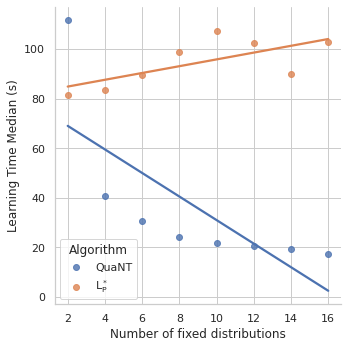

In [62]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="DISTRIBUTIONS", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, order = 1, ci = None)
ax.axes[0,0].set_xlabel("Number of fixed distributions", fontsize = 12)
ax.axes[0,0].set_ylabel("Learning Time Median (s)", fontsize = 12)
new_labels = ["QuaNT","$\mathrm{L_{P}^*}$"]
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

/opt/conda/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


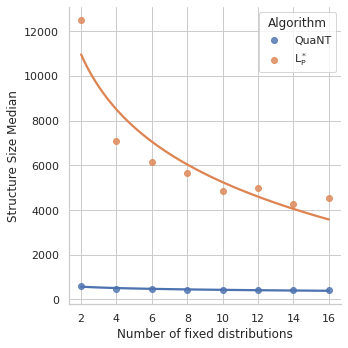

In [66]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="DISTRIBUTIONS", y="STRUCTURE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, logx = True, ci = None)
ax.axes[0,0].set_xlabel("Number of fixed distributions", fontsize = 12)
ax.axes[0,0].set_ylabel("Structure Size Median", fontsize = 12)
new_labels = ["QuaNT","$\mathrm{L_{P}^*}$"]
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)

# Tree Depth Analysis

In [15]:
evaluation_data_Quant = evaluation_data.loc[evaluation_data["Algorithm"] == 'QuantNaryTreeLearner' ]
evaluation_data_Quant.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time (s)', 'LastTokenQuery',
       'EquivalenceQuery', 'OT Prefixes', 'OT Suffixes', 'Tree Depth',
       'Inner Nodes', 'LogProbError', 'WER', 'NDCG', 'OOPartition',
       'OOTolerance', 'AbsoluteError', 'OT_SIZE', 'TREE_SIZE',
       'STRUCTURE_SIZE', 'DISTRIBUTIONS'],
      dtype='object')

In [16]:
evaluation_data_Quant['Tree Depth'].value_counts()

5.0     189
6.0      99
4.0      63
10.0     54
11.0     36
7.0       9
Name: Tree Depth, dtype: int64

Text(0, 0.5, 'Tree Depth')

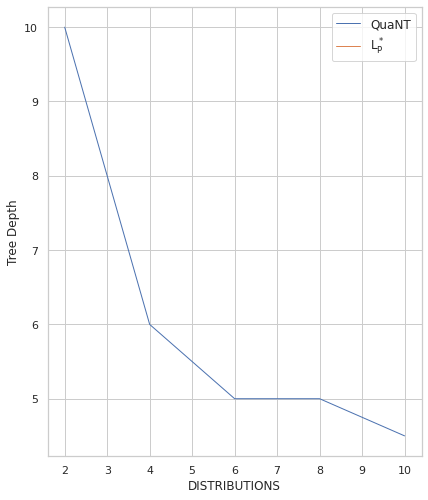

In [17]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="DISTRIBUTIONS", y="TreeDepth_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT", "$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("DISTRIBUTIONS", fontsize = 12)
ax.set_ylabel("Tree Depth", fontsize = 12)